In [1]:
from k1lib.imports import *

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def perlin(x, y, seed=0):
    # permutation table
    np.random.seed(seed)
    p = np.arange(256, dtype=int)
    np.random.shuffle(p)
    p = np.stack([p, p]).flatten()
    # coordinates of the top-left
    xi, yi = x.astype(int), y.astype(int)
    # internal coordinates
    xf, yf = x - xi, y - yi
    # fade factors
    u, v = fade(xf), fade(yf)
    # noise components
    n00 = gradient(p[p[xi] + yi], xf, yf)
    n01 = gradient(p[p[xi] + yi + 1], xf, yf - 1)
    n11 = gradient(p[p[xi + 1] + yi + 1], xf - 1, yf - 1)
    n10 = gradient(p[p[xi + 1] + yi], xf - 1, yf)
    # combine noises
    x1 = lerp(n00, n10, u)
    x2 = lerp(n01, n11, u)  # FIX1: I was using n10 instead of n01
    return lerp(x1, x2, v)  # FIX2: I also had to reverse x1 and x2 here

def lerp(a, b, x):
    "linear interpolation"
    return a + x * (b - a)

def fade(t):
    "6t^5 - 15t^4 + 10t^3"
    return 6 * t**5 - 15 * t**4 + 10 * t**3

def gradient(h, x, y):
    "grad converts h to the right gradient vector and return the dot product with (x,y)"
    vectors = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
    g = vectors[h % 4]
    return g[:, :, 0] * x + g[:, :, 1] * y

In [16]:
%%time

# EDIT : generating noise at multiple frequencies and adding them up
p = np.zeros((3000,3000))
for i in range(4):
    freq = 2**i
    lin = np.linspace(0, freq, 3000, endpoint=False)
    x, y = np.meshgrid(lin, lin)  # FIX3: I thought I had to invert x and y here but it was a mistake
    p = perlin(x, y, seed=87) / freq + p

CPU times: user 19.1 s, sys: 7.18 s, total: 26.3 s
Wall time: 42.7 s


In [17]:
p | aS(dill.dumps) | file("p_temps_3000.pth")

'p_temps_3000.pth'

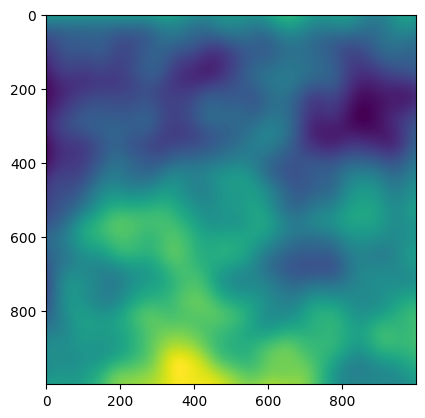

In [10]:
plt.imshow(p)

In [8]:
p | shape()

(100, 100)

In [ ]:
%%time
edge = 3000
def perlin(): return k1.perlin3d((edge, edge, 2)) | item().all(2)
p_temps = perlin(); #rh = perlin()

In [7]:
p_temps | aS(dill.dumps) | file("p_temps.pth")

TypeError: cannot pickle 'generator' object

In [6]:
rh | aS(dill.dumps) | file("p_rh.pth")

'p_rh.pth'

In [7]:
p_temps = cat("p_temps.pth", False) | aS(dill.loads)

In [9]:
p_temps | toMin()

-0.38219824785430456

In [10]:
p_temps | toMax()

0.3128210896942992

In [2]:
#s1 = sql("0.0.0.0", 3307, "root", "g7UFY5cUAOF2TKs2MifvJA4YC");
s2 = sql("127.0.0.1", 5433, "quang", "c7jPLPbGlF9T2pbaWE6Jz9V83", mode="pg"); s = s2; central = cdb = s["central"]; db = s["sari"]; s2

<sql mode=pg host=127.0.0.1:5433>

In [3]:
db | ls()

[<sqltable host=127.0.0.1:5433 db=sari table=groupvalves>,
 <sqltable host=127.0.0.1:5433 db=sari table=timeouts>,
 <sqltable host=127.0.0.1:5433 db=sari table=valves>]

In [12]:
for idx, lat, lng, isPump, name in s["ecopark"]["valves"].query("select id, lat, lng, isPump, name from valves"):
    db["valves"].insert(lat=lat, lng=lng, isPump=isPump, name=name)

In [19]:
db ['valves'].info()

Table `valves` (158 rows total)

rh          id   lat                  lng                  ispump   watervolume   kgfertilizer   temp        name      
71.1715     1    20.955391            105.932642           None     2.0751588     1.2005796      29.600195   '#15-2'   
83.588234   2    20.94989074917021    105.93885315170581   False    9.159945      8.152971       29.857092   '#5-2'    
83.72254    3    20.94972046470019    105.93823587626001   False    1.4121722     8.488032       34.65035    '#5-3'    
84.388916   4    20.951677137361816   105.93936982580486   True     2.253924      9.167033       29.304108   '#24-1'   
83.8781     5    20.950056473145523   105.93791341762575   False    1.3814865     6.187803       27.679087   '#5-6'    
78.13878    6    20.95429894915756    105.94314455939592   False    9.772836      8.65262        26.2275     '#7-1'    
84.27814    7    20.954117081990347   105.94341398529674   False    8.8795395     7.698641       27.350042   '#7-4'    
77.7763

In [10]:
random.random()

0.18008410094346805

In [11]:
for row in db["valves"]: 
    row.temp = random.random()*10 + 25

In [13]:
for row in db["valves"]:
    row.RH = random.random()*20 + 70 

In [18]:
db ['valves'].info()

Table `valves` (158 rows total)

rh          id   lat                  lng                  ispump   watervolume   kgfertilizer   temp        name      
71.1715     1    20.955391            105.932642           None     2.0751588     1.2005796      29.600195   '#15-2'   
83.588234   2    20.94989074917021    105.93885315170581   False    9.159945      8.152971       29.857092   '#5-2'    
83.72254    3    20.94972046470019    105.93823587626001   False    1.4121722     8.488032       34.65035    '#5-3'    
84.388916   4    20.951677137361816   105.93936982580486   True     2.253924      9.167033       29.304108   '#24-1'   
83.8781     5    20.950056473145523   105.93791341762575   False    1.3814865     6.187803       27.679087   '#5-6'    
78.13878    6    20.95429894915756    105.94314455939592   False    9.772836      8.65262        26.2275     '#7-1'    
84.27814    7    20.954117081990347   105.94341398529674   False    8.8795395     7.698641       27.350042   '#7-4'    
77.7763

In [17]:
for row in db["valves"]:
    row.kgFertilizer = random.random()*9 + 1

In [14]:
for row in db["valves"]:
    row.watervolume = random.random()*9 + 1

In [7]:
db | ls()

[<sqltable host=127.0.0.1:5433 db=sari table=groupvalves>,
 <sqltable host=127.0.0.1:5433 db=sari table=timeouts>,
 <sqltable host=127.0.0.1:5433 db=sari table=valves>]

In [13]:
db.query("alter table groupValves add valveIds BIGINT[]")

In [3]:
db.query("""
CREATE TABLE groupValves ( /* this contains information about what group should control what valve? */
    id bigserial primary key,
    groupId BIGINT,
    valveIds BIGINT[]
);""")

In [5]:
db.query("""
CREATE TABLE valves (
    id bigserial primary key,
    name VARCHAR(20), /* name of the valve, like #40-4 */
    lat DOUBLE PRECISION,
    lng DOUBLE PRECISION,
    isPump BOOL, 
    waterVolume real, 
    kgFertilizer real,
    temp real,
    RH real,
);""")

In [6]:
db.query("""
CREATE TABLE timeouts (
    id bigserial primary key,
    valveId BIGINT,
    timeout BIGINT /* unix time */
);""")

In [7]:
db | ls()

[<sqltable host=127.0.0.1:5433 db=sari table=groupvalves>,
 <sqltable host=127.0.0.1:5433 db=sari table=valves>,
 <sqltable host=127.0.0.1:5433 db=sari table=timeouts>]

In [176]:
db["timeouts"].info()

Table `timeouts` (0 rows total)

id   valveid   timeout   
...
...
id   valveid   timeout   

Table format:
column_name   data_type   is_nullable   column_default                         ordinal_position   
id            bigint      NO            nextval('timeouts_id_seq'::regclass)   1                  
valveid       bigint      YES           None                                   2                  
timeout       bigint      YES           None                                   3                  

Indexes:
tablename   indexname       indexdef                                                                
timeouts    timeouts_pkey   CREATE UNIQUE INDEX timeouts_pkey ON public.timeouts USING btree (id)   


In [117]:
gs = cdb["groups"].select("select * from groups where createdUserId = 1 and name != 'ecopark_admin' and app = 'ecopark'")
actualGs = db["groupValves"].select("select * from groupValves where groupId in %s", tuple([g.id for g in gs]))
missingGs = gs | op().id.all() | ~inSet(actualGs | op().groupId.all() | deref()) | deref()
for gId in missingGs: db["groupValves"].insert(groupId=gId, valveIds="")
if len(missingGs): actualGs = db["groupValves"].select("select * from groupValves where groupId in %s", tuple([g.id for g in gs]))

In [125]:
ir = [gs | apply(lambda g: [g.id, [g.name, g.userIds.split(";") | filt("x") | shape(0)]]), actualGs | apply(lambda g: [g.groupId, [g.valveIds]])] | joinSt() | groupBy(0, True) | apply(joinSt(2), 1) | ~apply(lambda x,y: [x,*y]) | deref(); ir

[[5, 'Zone 1', 1, '1;2;3;6;7;9;10']]

In [121]:
ir | apply(op().split(";") | filt("x") | shape(0), 3) | viz.Table(["idx", "name", "#users", "#valves"])

idx,name,#users,#valves
5,Zone 1,1,7


In [127]:
cdb["groups"].info()

Table `groups` (3 rows total)

ownergroupid   invitelinkenabled   id   createduserid   createdtime   app         name              userids       
1              False               1    1               1712440218    'auth'      'root'            '1'           
2              True                2    1               1712440252    'ecopark'   'ecopark_admin'   '1;4;5;6;7'   
None           True                5    1               1712520180    'ecopark'   'Zone 1'          '1;7'         
...
...
ownergroupid   invitelinkenabled   id   createduserid   createdtime   app         name              userids       
1              False               1    1               1712440218    'auth'      'root'            '1'           
2              True                2    1               1712440252    'ecopark'   'ecopark_admin'   '1;4;5;6;7'   
None           True                5    1               1712520180    'ecopark'   'Zone 1'          '1;7'         

Table format:
column_name         data_t

In [126]:
db["groupValves"].info()

Table `groupvalves` (1 rows total)

id   groupid   valveids           
1    5         '1;2;3;6;7;9;10'   
...
...
id   groupid   valveids           
1    5         '1;2;3;6;7;9;10'   

Table format:
column_name   data_type   is_nullable   column_default                            ordinal_position   
id            bigint      NO            nextval('groupvalves_id_seq'::regclass)   1                  
groupid       bigint      YES           None                                      2                  
valveids      text        YES           None                                      3                  

Indexes:
tablename     indexname          indexdef                                                                      
groupvalves   groupvalves_pkey   CREATE UNIQUE INDEX groupvalves_pkey ON public.groupvalves USING btree (id)   


In [123]:
valves = db["valves"][ir | filt("x == 5", 0) | cut(3) | item() | op().split(";") | filt("x") | apply(int) | deref()]

In [124]:
valves | apply(lambda x: [x.id, x.name]) | viz.Table(["idx", "valve"])

idx,valve
1,#2-1
2,#5-2
3,#5-3
6,#5-6
7,#7-1
9,#7-4
10,#7-5


In [157]:
db["valves"].info()

Table `valves` (156 rows total)

id   lat                  lng                  ispump   name     
1    20.949695221335915   105.93659095752587   False    '#2-1'   
2    20.94989074917021    105.93885315170581   False    '#5-2'   
3    20.94972046470019    105.93823587626001   False    '#5-3'   
4    20.949879689364234   105.93820927751445   False    '#5-4'   
5    20.949746198288587   105.93830216640202   False    '#5-5'   
6    20.950056473145523   105.93791341762575   False    '#5-6'   
7    20.95429894915756    105.94314455939592   False    '#7-1'   
8    20.954183985650925   105.94329828488485   False    '#7-2'   
9    20.954117081990347   105.94341398529674   False    '#7-4'   
...
...
id    lat                  lng                  ispump   name      
148   20.94992594682528    105.93541963604764   False    '#46-3'   
149   20.95006367075564    105.93524295898357   False    '#46-4'   
150   20.950187091707136   105.93510561547306   False    '#46-5'   
151   20.966952072433706   

In [71]:
actualGs | apply(lambda g: [g.groupId, [g.valveIds]]) | deref()

[[5, ['']]]

In [53]:
[[g.id, g.name, len([u for u in g.userIds.split(";") if u])] for g in gs] | viz.Table(["idx", "name", "#users"])

idx,name,#users
5,Zone 1,1


In [31]:
gs

[(ownergroupid=None, invitelinkenabled=True, id=5, createduserid=1, createdtime=1712520180, app=(7 len) "ecopark", name=(6 len) "Zone 1", userids=(1 len) "1")]

In [32]:
actualGs

[]

In [16]:
db["groupValves"].info()

Table `groupvalves` (0 rows total)

id   groupid   valveids   
...
...
id   groupid   valveids   

Table format:
column_name   data_type   is_nullable   column_default                            ordinal_position   
id            bigint      NO            nextval('groupvalves_id_seq'::regclass)   1                  
groupid       bigint      YES           None                                      2                  
valveids      text        YES           None                                      3                  

Indexes:
tablename     indexname          indexdef                                                                      
groupvalves   groupvalves_pkey   CREATE UNIQUE INDEX groupvalves_pkey ON public.groupvalves USING btree (id)   


In [11]:
db["valves"].info()

Table `valves` (156 rows total)

id   lat                  lng                  name     
1    20.949695221335915   105.93659095752587   '#2-1'   
2    20.94989074917021    105.93885315170581   '#5-2'   
3    20.94972046470019    105.93823587626001   '#5-3'   
4    20.949879689364234   105.93820927751445   '#5-4'   
5    20.949746198288587   105.93830216640202   '#5-5'   
6    20.950056473145523   105.93791341762575   '#5-6'   
7    20.95429894915756    105.94314455939592   '#7-1'   
8    20.954183985650925   105.94329828488485   '#7-2'   
9    20.954117081990347   105.94341398529674   '#7-4'   
...
...
id    lat                  lng                  name      
148   20.94992594682528    105.93541963604764   '#46-3'   
149   20.95006367075564    105.93524295898357   '#46-4'   
150   20.950187091707136   105.93510561547306   '#46-5'   
151   20.966952072433706   105.92915993135735   '#48-1'   
152   20.967533            105.929921           '#48-2'   
153   20.967301401850552   105.9295

In [140]:
cdb["users"].info()

Table `users` (6 rows total)

id   createdtime   email                      groupids    lastapp     password                                             name              
1    None          '157239q@gmail.com'        '1;2;5;6'   'ecopark'   '$2b$12$ip1i2V9V48fNhndwCcLusu22aCqTCzGcTaMCc3NQWB   'Hồ Ngọc Quang'   
3    1711353546    'john'                     ''          'ecopark'   '$2b$12$764iNngFaq76uyeY781iFOgKHmikGdy6d71uLZBmVD   'John'            
4    1712266231    'reimu'                    '6;7'       'ecopark'   '$2b$12$eOvQvv2MZwmu9Gif3/rQXecfwLhFthrGYltKSXtNpN   'Reimu'           
5    1712307342    'qhaikieu1304@gmail.com'   '2'         None        '$2b$12$AUogTde2QnhhZlo1i1m35ei8kqvc8apemy3JYzNU//   'Hải'             
7    1712519073    'marisa'                   '5'         'ecopark'   '$2b$12$/ViI.vm5loNNhpi/10MIluJLWDplYSoVi4DnC6RFZc   'Marisa'          
8    1712537378    'alice'                    ''          'ecopark'   '$2b$12$cSU23sIHvfdj2hCSQqpTfOzUnk2Oiw.ouCu8uNwa

In [144]:
cdb["groupEvents"].info()

Table `groupevents` (16 rows total)

id   time         userid   groupid   joining   
1    1712506114   4        2         False     
2    1712508167   4        2         False     
3    1712509107   2        2         False     
4    1712509112   4        2         False     
5    1712516640   1        3         False     
6    1712516640   4        3         False     
7    1712518159   1        4         False     
8    1712518159   4        4         False     
9    1712518243   4        2         False     
...
...
id   time         userid   groupid   joining   
8    1712518159   4        4         False     
9    1712518243   4        2         False     
10   1712530101   7        2         False     
11   1712531554   4        2         False     
12   1712532367   4        5         False     
13   1712535942   3        2         False     
14   1712537573   3        2         False     
15   None         1        2         True      
16   None         1        2         True  

In [145]:
cdb["groups"].info()

Table `groups` (5 rows total)

ownergroupid   invitelinkenabled   id   createduserid   createdtime   app         name               userids   
1              False               1    1               1712440218    'auth'      'root'             '1'       
2              True                2    1               1712440252    'ecopark'   'ecopark_admin'    '1;5;6'   
None           True                5    1               1712520180    'ecopark'   'Zone 1'           '1;7'     
None           True                6    1               1712532361    'ecopark'   'Zone 2'           '1;4'     
None           True                7    4               1712534126    'all'       'Hakurei Shrine'   '4'       
...
...
ownergroupid   invitelinkenabled   id   createduserid   createdtime   app         name               userids   
1              False               1    1               1712440218    'auth'      'root'             '1'       
2              True                2    1               171244025

In [149]:
s | ls()

[<sqldb host=127.0.0.1:5433 db=postgres>,
 <sqldb host=127.0.0.1:5433 db=quang>,
 <sqldb host=127.0.0.1:5433 db=auth>,
 <sqldb host=127.0.0.1:5433 db=central>,
 <sqldb host=127.0.0.1:5433 db=content>,
 <sqldb host=127.0.0.1:5433 db=ecopark>,
 <sqldb host=127.0.0.1:5433 db=email>,
 <sqldb host=127.0.0.1:5433 db=inventory>,
 <sqldb host=127.0.0.1:5433 db=replicate>,
 <sqldb host=127.0.0.1:5433 db=sentry>]

In [12]:
valves = db["valves"]

In [22]:
for name, [lat, lng] in json.loads(base64.b64decode("W1siIzItMSIsIFsyMC45NDk2OTUyMjEzMzU5MTUsIDEwNS45MzY1OTA5NTc1MjU4N11dLCBbIiM1LTIiLCBbMjAuOTQ5ODkwNzQ5MTcwMjEsIDEwNS45Mzg4NTMxNTE3MDU4MV1dLCBbIiM1LTMiLCBbMjAuOTQ5NzIwNDY0NzAwMTksIDEwNS45MzgyMzU4NzYyNjAwMV1dLCBbIiM1LTQiLCBbMjAuOTQ5ODc5Njg5MzY0MjM0LCAxMDUuOTM4MjA5Mjc3NTE0NDVdXSwgWyIjNS01IiwgWzIwLjk0OTc0NjE5ODI4ODU4NywgMTA1LjkzODMwMjE2NjQwMjAyXV0sIFsiIzUtNiIsIFsyMC45NTAwNTY0NzMxNDU1MjMsIDEwNS45Mzc5MTM0MTc2MjU3NV1dLCBbIiM3LTEiLCBbMjAuOTU0Mjk4OTQ5MTU3NTYsIDEwNS45NDMxNDQ1NTkzOTU5Ml1dLCBbIiM3LTIiLCBbMjAuOTU0MTgzOTg1NjUwOTI1LCAxMDUuOTQzMjk4Mjg0ODg0ODVdXSwgWyIjNy00IiwgWzIwLjk1NDExNzA4MTk5MDM0NywgMTA1Ljk0MzQxMzk4NTI5Njc0XV0sIFsiIzctNSIsIFsyMC45NTQ1MjAyNTkxMTU2MzMsIDEwNS45NDQyNjQxNzE1ODY4N11dLCBbIiM3LTciLCBbMjAuOTU0NDQwNzk0MTk5NTE3LCAxMDUuOTQ0MjM4Mzc2MDQ5NDNdXSwgWyIjNy04IiwgWzIwLjk1MzkyNDg2MTI3MDY0LCAxMDUuOTQzOTUzMzg0NzE0MjNdXSwgWyIjNy05IiwgWzIwLjk1MzY0NTY5MTgzOTc3OCwgMTA1Ljk0MzY2MTUxNzMyNTg4XV0sIFsiIzctMTAiLCBbMjAuOTU0MzgwMDEyNjE2MDM1LCAxMDUuOTQ0MTYwNjAwMjM2MjNdXSwgWyIjOC0xIiwgWzIwLjk0OTAxNzkzMTU1Mjg3NywgMTA1LjkzNzU5MDk4NzA4OTU1XV0sIFsiIzgtMiIsIFsyMC45NDg2NTU1MDU4ODkyMzUsIDEwNS45MzgxMzM2NzkwMTgwMl1dLCBbIiM4LTIiLCBbMjAuOTQ4NjMzNTY2OTgyMTg1LCAxMDUuOTM4MjU3ODMzMDk0ODJdXSwgWyIjOC0zIiwgWzIwLjk0OTA0MzMzNjIzOTc2OCwgMTA1LjkzODE0NTI2MDI1OTQ1XV0sIFsiIzgtNCIsIFsyMC45NDkyNzQ0MDk2NTE2NCwgMTA1LjkzODA2MTQ0NTMyNjg3XV0sIFsiIzgtNSIsIFsyMC45NDkwMDU4MjIwMjk4NjQsIDEwNS45MzgwNTQ2OTA2Nzg1OF1dLCBbIiM4LTYiLCBbMjAuOTQ5MDIwODk1NjU1MDQ2LCAxMDUuOTM3MjE2MTE5MTg3MjddXSwgWyIjOC04IiwgWzIwLjk0OTAwNjY1MDk3MDIzMywgMTA1LjkzNzg1ODEwMzc2ODQzXV0sIFsiIzgtOSIsIFsyMC45NDkyNzQ0MDk2NTE2NCwgMTA1LjkzNzYzOTMyMjI5NjhdXSwgWyIjOS0xIiwgWzIwLjk1NTUxMzE1ODY0MDYzNSwgMTA1Ljk0NDI3ODg0Mjc1NDk0XV0sIFsiIzktMiIsIFsyMC45NTcwMzQ4MzUyNDE5MDIsIDEwNS45NDMzMjg5NTUwMjE5NF1dLCBbIiM5LTMiLCBbMjAuOTU2MjIzOTEwMzc0OTE2LCAxMDUuOTQzNzQ3NTc3NjA1NzZdXSwgWyIjOS00IiwgWzIwLjk1NjM4MzQxMjM3NjAzLCAxMDUuOTQzNzg1NzUzNDMwNDJdXSwgWyIjOS02IiwgWzIwLjk1NTI3MTY5NDIxODkxLCAxMDUuOTQ0MzYzMjYwNzgxMTJdXSwgWyIjOS03IiwgWzIwLjk1NTUwNjQyNzY1NzkwNSwgMTA1Ljk0NDExMTAxNzEyNzk0XV0sIFsiIzktOCIsIFsyMC45NTQ3NjM4ODY4OTk5OCwgMTA1Ljk0NDMxMjIwODkwODE3XV0sIFsiIzktOSIsIFsyMC45NTQ5MTk1NzQ1MTg2NjYsIDEwNS45NDQ1NjYzMzI1NDYzM11dLCBbIiM5LTEwIiwgWzIwLjk1NTEwMjQxOTY5NzkwNSwgMTA1Ljk0NDA4NDYwMTYzMjM3XV0sIFsiIzEwLTEiLCBbMjAuOTU2MDIwNDE0MTAwMDEsIDEwNS45NDE3MDI4OTY0MzIyOF1dLCBbIiMxMC0yIiwgWzIwLjk1NjAwNDM1OTM4MDI1MiwgMTA1Ljk0MTY0NDk0MzIwMzhdXSwgWyIjMTEtMSIsIFsyMC45NjY4NTY3NTgxMzI1LCAxMDUuOTMwMjM5NTAwMjY4NzhdXSwgWyIjMTEtMiIsIFsyMC45NjY3NzYxODMzNzY3ODcsIDEwNS45MzAxNzYyNzc0Mjc2Ml1dLCBbIiMxMS0zIiwgWzIwLjk2NjgyNzY1ODEyMDk1MiwgMTA1LjkzMDA3OTY0MDg5MDY4XV0sIFsiIzExLTQiLCBbMjAuOTY3MDk3ODEzMDIxODEyLCAxMDUuOTI5NzY2MDgyMzM4NTJdXSwgWyIjMTEtNSIsIFsyMC45NjY4NTkzNzI0MTgzMDIsIDEwNS45Mjk5NzMxNjA2MzE5Nl1dLCBbIiMxMS02IiwgWzIwLjk2NjQ1NTExNTg5MTU0NSwgMTA1LjkyOTk3MzE2MDYzMTk2XV0sIFsiIzExLTciLCBbMjAuOTY1ODY0MDYzMjE0MDYzLCAxMDUuOTMwMDQ0MzIzNTM3NjddXSwgWyIjMTItMyIsIFsyMC45NTY4NDI1NjQ3MzAwMTQsIDEwNS45NDI3OTM3NTQzOTQ2XV0sIFsiIzEyLTQiLCBbMjAuOTU3MDE3NjExMTM0NzIsIDEwNS45NDMyNTAyMjU1NjI0OF1dLCBbIiMxMi01IiwgWzIwLjk1Njk4Nzc5NjEzODM5MiwgMTA1Ljk0MzMwOTQ2MDI2MjU1XV0sIFsiIzEyLTYiLCBbMjAuOTU2Nzk4MzI0MjQzNjksIDEwNS45NDM3MDY0NzUwODg3NV1dLCBbIiMxMi03IiwgWzIwLjk1NzAwMTI4ODQyNjMzMywgMTA1Ljk0MzY2MjE0Mjc2OTddXSwgWyIjMTItOCIsIFsyMC45NTY5MDgzNDkwNTYzMzQsIDEwNS45NDI4ODE5MjcxMzU3OV1dLCBbIiMxNC0xIiwgWzIwLjk0OTMwNDQxMDMwMTEwNywgMTA1LjkzNDk0NTk3OTA0ODQ2XV0sIFsiIzE0LTIiLCBbMjAuOTQ5MzAyNzQyNDgwMTEsIDEwNS45MzUzNDE1MTAyNDEwM11dLCBbIiMxNC02IiwgWzIwLjk0OTQwMzQ5MzM5NDg5NywgMTA1LjkzNDc2MzYwNDQ0MTg0XV0sIFsiIzE0LTciLCBbMjAuOTQ5MzA0NTcxOTI2OTY2LCAxMDUuOTM0Nzc3MTkyMzY2Ml1dLCBbIiMxNC04IiwgWzIwLjk0OTA0NDc5MTc4NDI0LCAxMDUuOTM1NTM3NTUzNTA0NTldXSwgWyIjMTQtOSIsIFsyMC45NDg5MTIzODU0OTkxMzUsIDEwNS45MzQ1NDUwNTA5MjM1OV1dLCBbIiMxNC0xMCIsIFsyMC45NDk1NjA0MDgxOTM2NTUsIDEwNS45MzQ2NzMyMTMxNzAyOV1dLCBbIiMxNS0xIiwgWzIwLjk1NDg0OTg1MDM0OTI2NiwgMTA1LjkzMzA2NDc3OTc3MjY1XV0sIFsiIzE2LTEiLCBbMjAuOTU2MDcxNjE1NDcxNjU0LCAxMDUuOTQzMDkwNzc4NTI0NDVdXSwgWyIjMTYtMiIsIFsyMC45NTU5MjE2OTg1MTEwMjcsIDEwNS45NDM0NTE4ODA4MTUzN11dLCBbIiMxNi0zIiwgWzIwLjk1NTc3MzQ1NzY5MjA4MiwgMTA1Ljk0MzU5MDc0NjY1NzY4XV0sIFsiIzE2LTQiLCBbMjAuOTU1OTMzNTM0OTM2OTg1LCAxMDUuOTQzMTMxNzQzNjU2OTldXSwgWyIjMTYtNSIsIFsyMC45NTY0MzczNjU2OTYzOCwgMTA1Ljk0MjU1MjQ4NzMzNDg1XV0sIFsiIzE2LTUiLCBbMjAuOTU2MDY4Mjk4NjI0NDQ0LCAxMDUuOTQyOTU0MTk1ODk5NTldXSwgWyIjMTYtNiIsIFsyMC45NTU3NzIyMjk0MzIyMywgMTA1Ljk0MjcwMjMyMDczMThdXSwgWyIjMTYtNyIsIFsyMC45NTU4Nzk0NjYyMDIxMzQsIDEwNS45NDMwMDk0Njg2NjMyMl1dLCBbIiMxOC0xIiwgWzIwLjk2NTczMDQ5ODE2OTU0LCAxMDUuOTI0NzY2MTg3NjA4MDFdXSwgWyIjMTgtMiIsIFsyMC45NjQ0NzE4MDAzMTM5MDUsIDEwNS45MjM3NDMzODk3Mzk5OF1dLCBbIiMxOC0yIiwgWzIwLjk2NDk2NTg0MDA1MjMxNSwgMTA1LjkyMzg4ODU2Njc5ODY3XV0sIFsiIzE4LTMiLCBbMjAuOTY0Mjc2MTk4NDYyMjg3LCAxMDUuOTIzOTYzOTQ4MDA5OTRdXSwgWyIjMTgtNCIsIFsyMC45NjUxMjQ2NTMwMjE0NzMsIDEwNS45MjQxNzAwODk1MTgxN11dLCBbIiMxOC01IiwgWzIwLjk2NTY3NzE0NTIwNjYzNywgMTA1LjkyNDE0ODUxNzAxNDc5XV0sIFsiIzE4LTYiLCBbMjAuOTY1NzEyNzA5MjU4NjY4LCAxMDUuOTI0NDUwNTA0OTQ1XV0sIFsiIzE4LTciLCBbMjAuOTY2NTc1NTAwMTY2MjA0LCAxMDUuOTI1ODM0NjkxMTI5ODRdXSwgWyIjMTgtOCIsIFsyMC45NjY1NDMwNjY3MzExMzgsIDEwNS45MjcyMDUwMjIwMzc4MV1dLCBbIiMxOS0xIiwgWzIwLjk1NTEzODExMzQ3NTU0LCAxMDUuOTMzODEyMjE4OTg3M11dLCBbIiMyMC0xIiwgWzIwLjk1NDUxOTk4MjMwNzYsIDEwNS45NDUxNTUzNjY3MzY3OF1dLCBbIiMyMC0yIiwgWzIwLjk1NDA1ODY1MDM5Mzk5NiwgMTA1Ljk0NDQ0MjU1MjUxMTczXV0sIFsiIzIwLTMiLCBbMjAuOTU0MDEyODA2MDY0NzUsIDEwNS45NDQ0NDI1NTI1MTE3M11dLCBbIiMyMC00IiwgWzIwLjk1NDQwOTE0MDIyMDYyNiwgMTA1Ljk0NDc3MTM1NjE5NzczXV0sIFsiIzIwLTUiLCBbMjAuOTU0Njg3MTk4OTA1MjY1LCAxMDUuOTQ1MTU1MzY2NzM2NzhdXSwgWyIjMjAtNiIsIFsyMC45NTQ5NjYwMjU4MzgwMzYsIDEwNS45NDQ4NjgxNDg5NjU5N11dLCBbIiMyMC03IiwgWzIwLjk1NTAwMzAwNzc0Mjk3LCAxMDUuOTQ0ODEyOTcwMzI3Ml1dLCBbIiMyMS0xIiwgWzIwLjk0NzYyMjMzMjk3MzE4MiwgMTA1LjkzNTU3ODEyMDAyNDY5XV0sIFsiIzIxLTMiLCBbMjAuOTQ3NzQ0MTExNTY1MzQsIDEwNS45MzU3MTI5MTA1OTEwNV1dLCBbIiMyMS00IiwgWzIwLjk0NzY4OTczOTI4OTc1MywgMTA1LjkzNDg1ODY2MjI4MTNdXSwgWyIjMjEtNSIsIFsyMC45NDc1ODUxNDgzOTMzNDgsIDEwNS45MzQ2NTQzNTk2OTE4XV0sIFsiIzIxLTYiLCBbMjAuOTQ3NzYxNzA0NTMyMjU1LCAxMDUuOTM0Nzk1MDkxNTA3NF1dLCBbIiMyMS02IiwgWzIwLjk0Nzk1NjgyMDY0MzIsIDEwNS45MzQ3NDk2ODU4MjM0Ml1dLCBbIiMyMS03IiwgWzIwLjk0ODAxOTEzMTI1MTI3LCAxMDUuOTM1NTkxMzgyNjg1OF1dLCBbIiMyMS04IiwgWzIwLjk0Nzk1MDEyODY4MzU1LCAxMDUuOTM1NzQwNzAwOTIzNTldXSwgWyIjMjMtMSIsIFsyMC45NTExMzM5Mjc3NDc4LCAxMDUuOTQwNTg5OTg1NjM3NDJdXSwgWyIjMjMtMiIsIFsyMC45NTA2MjI4MjgxNjQwOTMsIDEwNS45NDA4OTY5NDI0NDA4Nl1dLCBbIiMyMy0zIiwgWzIwLjk1MDY2MTc4ODM5NjE5NywgMTA1LjkzOTczODI4NzM4Njk3XV0sIFsiIzIzLTQiLCBbMjAuOTQ5NzY4NTAwNTM0MzUsIDEwNS45Mzk0NzkzNzg5MzExNF1dLCBbIiMyMy01IiwgWzIwLjk0OTc0MTIwNzkyNzk4LCAxMDUuOTM5NTM1NjIyMDkzODddXSwgWyIjMjMtNiIsIFsyMC45NDk3MzEyMDcxMDU5MjMsIDEwNS45MzkxMDkzMjA3MDEyNl1dLCBbIiMyMy03IiwgWzIwLjk0OTQ0ODcyNjY0ODE3NSwgMTA1LjkzOTI1ODIwODkyNjQ3XV0sIFsiIzI0LTEiLCBbMjAuOTUxNjc3MTM3MzYxODE2LCAxMDUuOTM5MzY5ODI1ODA0ODZdXSwgWyIjMjQtMiIsIFsyMC45NTEwMDIyMzcxNjg2NTUsIDEwNS45Mzg5OTMwODM2MTI0Nl1dLCBbIiMyNC0zIiwgWzIwLjk1MTAzMzAwMTQzMDk1LCAxMDUuOTM4ODkyNTA2ODAzMjhdXSwgWyIjMjQtNCIsIFsyMC45NTA2MDcwNzQyODU4MjMsIDEwNS45Mzc5ODc1OTU5OTg4NV1dLCBbIiMyNC01IiwgWzIwLjk1MDY4OTM2NzcxNjQ4LCAxMDUuOTM3OTQ5NDQ1NjIyMDFdXSwgWyIjMjQtNiIsIFsyMC45NTAwNjQ4MjkyOTk4MSwgMTA1LjkzNjcyOTcwNDcyMjc3XV0sIFsiIzI0LTciLCBbMjAuOTUxNDA3NjYzMDQ0MjMzLCAxMDUuOTM5NjM3NDYyMjI5MjNdXSwgWyIjMjYtMSIsIFsyMC45NDgwNDAyODg2ODQ2NTIsIDEwNS45MzY4NDk1NTI1MDA5M11dLCBbIiMyNy0xIiwgWzIwLjk1MjQxNjgwODI1MDA3NCwgMTA1LjkzOTA1ODIwOTcwMDM1XV0sIFsiIzI3LTUiLCBbMjAuOTUyNDcxODU3NzkyODI2LCAxMDUuOTM5MTQ3Mzk5NTkxMTldXSwgWyIjMjgtMSIsIFsyMC45NTI0OTQ2OTg1MTE1NDcsIDEwNS45NDI2ODU5MjY0MjkwOV1dLCBbIiMyOC0yIiwgWzIwLjk1MjM2MzAyNTUzNTAxNCwgMTA1Ljk0MjM3OTAyODY5MTc5XV0sIFsiIzI4LTMiLCBbMjAuOTUyMjc4Nzg3NzE1MTk4LCAxMDUuOTQyMzcwMDk3MzI5NzldXSwgWyIjMjgtNCIsIFsyMC45NTEwNjk4MDQ2MzE5MjgsIDEwNS45NDE2MDQ1NDAyOTUwNV1dLCBbIiMyOC01IiwgWzIwLjk1MjQxNDc3MzMzMjQ2NCwgMTA1Ljk0MjkwNzk0NzE0MjE2XV0sIFsiIzI4LTYiLCBbMjAuOTUyMDY3MjE3ODYwMDczLCAxMDUuOTQyODY1MjYyODk4MjddXSwgWyIjMjgtNyIsIFsyMC45NTEyNTUwMDMzODQxMiwgMTA1Ljk0MjQ5NTA3NjczNjI0XV0sIFsiIzI4LTgiLCBbMjAuOTUwNTAzNTkyNTA4MjYyLCAxMDUuOTQyODY5NTA0MTAxOThdXSwgWyIjMjgtOSIsIFsyMC45NTA4NjEzMTUyODUsIDEwNS45NDIzMTk1MjY1NTAwNF1dLCBbIiMzMC01IiwgWzIwLjk0NzU4NjQ3NzI0MjQ0LCAxMDUuOTM0MjY1MTkxMzg5NjNdXSwgWyIjMzEtMyIsIFsyMC45NDc5NDY4MDA0NTE1ODYsIDEwNS45Mzk0MTYxMjI4ODU4Ml1dLCBbIiMzMS01IiwgWzIwLjk0Nzk1MjI4NDE2MTE5NywgMTA1LjkzODMzNjYyNjc0MzIxXV0sIFsiIzMxLTUiLCBbMjAuOTQ3OTUwNjkzMTQyOTQsIDEwNS45MzgwMzU4NjUwMjkzNV1dLCBbIiMzMS02IiwgWzIwLjk0Nzc0OTM5NzUxMjQ0NiwgMTA1LjkzODAxNTM2MTI3NzE1XV0sIFsiIzMxLTYiLCBbMjAuOTQ3NzQ5Mzk3NTEyNDQ2LCAxMDUuOTM4MzEwOTM3MDMwMjhdXSwgWyIjMzItMSIsIFsyMC45NTExNzY1Nzk2MTgyNDUsIDEwNS45MzU3OTY0NTk2MDcxMl1dLCBbIiMzMi0yIiwgWzIwLjk1MDg4NTQ1NDA3NDY2NSwgMTA1LjkzNTY1ODg5MjIxMzg4XV0sIFsiIzMyLTMiLCBbMjAuOTUwOTc3NDg2NjQ2NDk0LCAxMDUuOTM1Njc0ODM5ODA4OTddXSwgWyIjMzItNCIsIFsyMC45NTA0MzcwMTA0MzY5NTMsIDEwNS45MzYxMzMxNDI1MTA0NF1dLCBbIiMzMi01IiwgWzIwLjk1MDE4MDg2NTAwOTYzNSwgMTA1LjkzNjczNDUxNTExMDk4XV0sIFsiIzMyLTYiLCBbMjAuOTUxMDM3MzYxMTIyMjQzLCAxMDUuOTM0OTI3MzcyMTk0MjddXSwgWyIjMzItNyIsIFsyMC45NTA3ODY4NTI5MDMyNzgsIDEwNS45MzU1NzUxMjY2NTgxXV0sIFsiIzMyLTgiLCBbMjAuOTUwNjg5NjUyMjk0MjY1LCAxMDUuOTM1NDg4NjIxOTUxODVdXSwgWyIjMzItOSIsIFsyMC45NTAzOTY4Njk0MjEwNiwgMTA1LjkzNTQ1MjU5NTgyMjhdXSwgWyIjMzItMTAiLCBbMjAuOTUxMTY5MDM2NzAzMzQ1LCAxMDUuOTM0NTk2NjYwNzEzNjFdXSwgWyIjMzItMTAiLCBbMjAuOTUwNzcyNDgwNzA0OTczLCAxMDUuOTM0NTAwMTkyMjQwMjFdXSwgWyIjMzQtMSIsIFsyMC45NTUxMzY1OTI0MTQ0MzcsIDEwNS45NDIxNjg5NjExOTI4NV1dLCBbIiMzNC0yIiwgWzIwLjk1NTM4Mzg2Nzg0NTE3LCAxMDUuOTQyNDMxOTQwMTUyMTNdXSwgWyIjMzQtMyIsIFsyMC45NTU0MzUxNDU2MzU3MjUsIDEwNS45NDIwOTQwMjQ1ODI4OV1dLCBbIiMzNC00IiwgWzIwLjk1NTQxMjQxMDYwMjMxNCwgMTA1Ljk0MjczNDUwMzMxMTk3XV0sIFsiIzM0LTUiLCBbMjAuOTU1MTMzMTEzMzkxOTk0LCAxMDUuOTQyNDY0MzYyNTc4NDZdXSwgWyIjMzQtNiIsIFsyMC45NTQ5OTA0MDYxMDQ5ODMsIDEwNS45NDMwOTkzNjAxNjc1MV1dLCBbIiMzNC03IiwgWzIwLjk1NTUwMjcyMDk4OTgyNywgMTA1Ljk0MzA0ODM3MzEyODI0XV0sIFsiIzM1LTEiLCBbMjAuOTU1NDQxMzYxNzU2NDA3LCAxMDUuOTQ0NDA3MzE2OTAyMzNdXSwgWyIjMzUtMiIsIFsyMC45NTYwNjY2ODk0NjU3MywgMTA1Ljk0NDAwNDE2Nzk5MjVdXSwgWyIjMzUtMyIsIFsyMC45NTYyNzY3ODMxNTI4NjYsIDEwNS45NDM2MjI3MzU0MzExNV1dLCBbIiMzOS02IiwgWzIwLjk2Nzc4MjY5NjAzMTkxNCwgMTA1LjkyNTM0NzQ3MzY3Mjc0XV0sIFsiIzQzLTIiLCBbMjAuOTUxNTQ1NzkyMDkwOTIsIDEwNS45MzYwOTE5OTc4MzE1MV1dLCBbIiM0My0zIiwgWzIwLjk1MTM4NjEwMzU0NTQzLCAxMDUuOTM0NzQyMTU2MjQ2Nl1dLCBbIiM0NS0xIiwgWzIwLjk1ODI0MTQ2Njg3MjY0MywgMTA1LjkyNjAwNDgxOTU2MjJdXSwgWyIjNDYtMSIsIFsyMC45NTAxNzkyNDM3Njc1NywgMTA1LjkzNDgxMTA0OTc1NjkyXV0sIFsiIzQ2LTIiLCBbMjAuOTQ5ODYzODkyMzA2LCAxMDUuOTM0NDQ3MjM1Mzk5NV1dLCBbIiM0Ni0zIiwgWzIwLjk0OTkyNTk0NjgyNTI4LCAxMDUuOTM1NDE5NjM2MDQ3NjRdXSwgWyIjNDYtNCIsIFsyMC45NTAwNjM2NzA3NTU2NCwgMTA1LjkzNTI0Mjk1ODk4MzU3XV0sIFsiIzQ2LTUiLCBbMjAuOTUwMTg3MDkxNzA3MTM2LCAxMDUuOTM1MTA1NjE1NDczMDZdXSwgWyIjNDgtMSIsIFsyMC45NjY5NTIwNzI0MzM3MDYsIDEwNS45MjkxNTk5MzEzNTczNV1dLCBbIiM0OC0yIiwgWzIwLjk2NzUzMywgMTA1LjkyOTkyMV1dLCBbIiM0OC0zIiwgWzIwLjk2NzMwMTQwMTg1MDU1MiwgMTA1LjkyOTU3MTgzMzQ2NTg2XV0sIFsiIzQ4LTQiLCBbMjAuOTY3MDcwNTE1OTc0MTI1LCAxMDUuOTI5MDUxMzQwOTc0MjFdXSwgWyIjNDgtNyIsIFsyMC45NjY2ODk0MjgzMjcxOSwgMTA1LjkyNzg5NjkyMDg2NzE0XV0sIFsiIzQ5LTEiLCBbMjAuOTYzMzE3OTQ1NTY5NDE1LCAxMDUuOTIzNTc4MjE3NTY4MjldXV0=".encode()).decode()) | tee().autoInc():
    valves.insert(name=name, lat=lat, lng=lng)

155) 155, 1s elapsed, throughput: 79.2 /ss                                                

In [18]:
db["valves"] | cat() | deref() | item()

[1, '#2-1', 20.9497, 105.937]

In [19]:
json.loads(base64.b64decode("W1siIzItMSIsIFsyMC45NDk2OTUyMjEzMzU5MTUsIDEwNS45MzY1OTA5NTc1MjU4N11dLCBbIiM1LTIiLCBbMjAuOTQ5ODkwNzQ5MTcwMjEsIDEwNS45Mzg4NTMxNTE3MDU4MV1dLCBbIiM1LTMiLCBbMjAuOTQ5NzIwNDY0NzAwMTksIDEwNS45MzgyMzU4NzYyNjAwMV1dLCBbIiM1LTQiLCBbMjAuOTQ5ODc5Njg5MzY0MjM0LCAxMDUuOTM4MjA5Mjc3NTE0NDVdXSwgWyIjNS01IiwgWzIwLjk0OTc0NjE5ODI4ODU4NywgMTA1LjkzODMwMjE2NjQwMjAyXV0sIFsiIzUtNiIsIFsyMC45NTAwNTY0NzMxNDU1MjMsIDEwNS45Mzc5MTM0MTc2MjU3NV1dLCBbIiM3LTEiLCBbMjAuOTU0Mjk4OTQ5MTU3NTYsIDEwNS45NDMxNDQ1NTkzOTU5Ml1dLCBbIiM3LTIiLCBbMjAuOTU0MTgzOTg1NjUwOTI1LCAxMDUuOTQzMjk4Mjg0ODg0ODVdXSwgWyIjNy00IiwgWzIwLjk1NDExNzA4MTk5MDM0NywgMTA1Ljk0MzQxMzk4NTI5Njc0XV0sIFsiIzctNSIsIFsyMC45NTQ1MjAyNTkxMTU2MzMsIDEwNS45NDQyNjQxNzE1ODY4N11dLCBbIiM3LTciLCBbMjAuOTU0NDQwNzk0MTk5NTE3LCAxMDUuOTQ0MjM4Mzc2MDQ5NDNdXSwgWyIjNy04IiwgWzIwLjk1MzkyNDg2MTI3MDY0LCAxMDUuOTQzOTUzMzg0NzE0MjNdXSwgWyIjNy05IiwgWzIwLjk1MzY0NTY5MTgzOTc3OCwgMTA1Ljk0MzY2MTUxNzMyNTg4XV0sIFsiIzctMTAiLCBbMjAuOTU0MzgwMDEyNjE2MDM1LCAxMDUuOTQ0MTYwNjAwMjM2MjNdXSwgWyIjOC0xIiwgWzIwLjk0OTAxNzkzMTU1Mjg3NywgMTA1LjkzNzU5MDk4NzA4OTU1XV0sIFsiIzgtMiIsIFsyMC45NDg2NTU1MDU4ODkyMzUsIDEwNS45MzgxMzM2NzkwMTgwMl1dLCBbIiM4LTIiLCBbMjAuOTQ4NjMzNTY2OTgyMTg1LCAxMDUuOTM4MjU3ODMzMDk0ODJdXSwgWyIjOC0zIiwgWzIwLjk0OTA0MzMzNjIzOTc2OCwgMTA1LjkzODE0NTI2MDI1OTQ1XV0sIFsiIzgtNCIsIFsyMC45NDkyNzQ0MDk2NTE2NCwgMTA1LjkzODA2MTQ0NTMyNjg3XV0sIFsiIzgtNSIsIFsyMC45NDkwMDU4MjIwMjk4NjQsIDEwNS45MzgwNTQ2OTA2Nzg1OF1dLCBbIiM4LTYiLCBbMjAuOTQ5MDIwODk1NjU1MDQ2LCAxMDUuOTM3MjE2MTE5MTg3MjddXSwgWyIjOC04IiwgWzIwLjk0OTAwNjY1MDk3MDIzMywgMTA1LjkzNzg1ODEwMzc2ODQzXV0sIFsiIzgtOSIsIFsyMC45NDkyNzQ0MDk2NTE2NCwgMTA1LjkzNzYzOTMyMjI5NjhdXSwgWyIjOS0xIiwgWzIwLjk1NTUxMzE1ODY0MDYzNSwgMTA1Ljk0NDI3ODg0Mjc1NDk0XV0sIFsiIzktMiIsIFsyMC45NTcwMzQ4MzUyNDE5MDIsIDEwNS45NDMzMjg5NTUwMjE5NF1dLCBbIiM5LTMiLCBbMjAuOTU2MjIzOTEwMzc0OTE2LCAxMDUuOTQzNzQ3NTc3NjA1NzZdXSwgWyIjOS00IiwgWzIwLjk1NjM4MzQxMjM3NjAzLCAxMDUuOTQzNzg1NzUzNDMwNDJdXSwgWyIjOS02IiwgWzIwLjk1NTI3MTY5NDIxODkxLCAxMDUuOTQ0MzYzMjYwNzgxMTJdXSwgWyIjOS03IiwgWzIwLjk1NTUwNjQyNzY1NzkwNSwgMTA1Ljk0NDExMTAxNzEyNzk0XV0sIFsiIzktOCIsIFsyMC45NTQ3NjM4ODY4OTk5OCwgMTA1Ljk0NDMxMjIwODkwODE3XV0sIFsiIzktOSIsIFsyMC45NTQ5MTk1NzQ1MTg2NjYsIDEwNS45NDQ1NjYzMzI1NDYzM11dLCBbIiM5LTEwIiwgWzIwLjk1NTEwMjQxOTY5NzkwNSwgMTA1Ljk0NDA4NDYwMTYzMjM3XV0sIFsiIzEwLTEiLCBbMjAuOTU2MDIwNDE0MTAwMDEsIDEwNS45NDE3MDI4OTY0MzIyOF1dLCBbIiMxMC0yIiwgWzIwLjk1NjAwNDM1OTM4MDI1MiwgMTA1Ljk0MTY0NDk0MzIwMzhdXSwgWyIjMTEtMSIsIFsyMC45NjY4NTY3NTgxMzI1LCAxMDUuOTMwMjM5NTAwMjY4NzhdXSwgWyIjMTEtMiIsIFsyMC45NjY3NzYxODMzNzY3ODcsIDEwNS45MzAxNzYyNzc0Mjc2Ml1dLCBbIiMxMS0zIiwgWzIwLjk2NjgyNzY1ODEyMDk1MiwgMTA1LjkzMDA3OTY0MDg5MDY4XV0sIFsiIzExLTQiLCBbMjAuOTY3MDk3ODEzMDIxODEyLCAxMDUuOTI5NzY2MDgyMzM4NTJdXSwgWyIjMTEtNSIsIFsyMC45NjY4NTkzNzI0MTgzMDIsIDEwNS45Mjk5NzMxNjA2MzE5Nl1dLCBbIiMxMS02IiwgWzIwLjk2NjQ1NTExNTg5MTU0NSwgMTA1LjkyOTk3MzE2MDYzMTk2XV0sIFsiIzExLTciLCBbMjAuOTY1ODY0MDYzMjE0MDYzLCAxMDUuOTMwMDQ0MzIzNTM3NjddXSwgWyIjMTItMyIsIFsyMC45NTY4NDI1NjQ3MzAwMTQsIDEwNS45NDI3OTM3NTQzOTQ2XV0sIFsiIzEyLTQiLCBbMjAuOTU3MDE3NjExMTM0NzIsIDEwNS45NDMyNTAyMjU1NjI0OF1dLCBbIiMxMi01IiwgWzIwLjk1Njk4Nzc5NjEzODM5MiwgMTA1Ljk0MzMwOTQ2MDI2MjU1XV0sIFsiIzEyLTYiLCBbMjAuOTU2Nzk4MzI0MjQzNjksIDEwNS45NDM3MDY0NzUwODg3NV1dLCBbIiMxMi03IiwgWzIwLjk1NzAwMTI4ODQyNjMzMywgMTA1Ljk0MzY2MjE0Mjc2OTddXSwgWyIjMTItOCIsIFsyMC45NTY5MDgzNDkwNTYzMzQsIDEwNS45NDI4ODE5MjcxMzU3OV1dLCBbIiMxNC0xIiwgWzIwLjk0OTMwNDQxMDMwMTEwNywgMTA1LjkzNDk0NTk3OTA0ODQ2XV0sIFsiIzE0LTIiLCBbMjAuOTQ5MzAyNzQyNDgwMTEsIDEwNS45MzUzNDE1MTAyNDEwM11dLCBbIiMxNC02IiwgWzIwLjk0OTQwMzQ5MzM5NDg5NywgMTA1LjkzNDc2MzYwNDQ0MTg0XV0sIFsiIzE0LTciLCBbMjAuOTQ5MzA0NTcxOTI2OTY2LCAxMDUuOTM0Nzc3MTkyMzY2Ml1dLCBbIiMxNC04IiwgWzIwLjk0OTA0NDc5MTc4NDI0LCAxMDUuOTM1NTM3NTUzNTA0NTldXSwgWyIjMTQtOSIsIFsyMC45NDg5MTIzODU0OTkxMzUsIDEwNS45MzQ1NDUwNTA5MjM1OV1dLCBbIiMxNC0xMCIsIFsyMC45NDk1NjA0MDgxOTM2NTUsIDEwNS45MzQ2NzMyMTMxNzAyOV1dLCBbIiMxNS0xIiwgWzIwLjk1NDg0OTg1MDM0OTI2NiwgMTA1LjkzMzA2NDc3OTc3MjY1XV0sIFsiIzE2LTEiLCBbMjAuOTU2MDcxNjE1NDcxNjU0LCAxMDUuOTQzMDkwNzc4NTI0NDVdXSwgWyIjMTYtMiIsIFsyMC45NTU5MjE2OTg1MTEwMjcsIDEwNS45NDM0NTE4ODA4MTUzN11dLCBbIiMxNi0zIiwgWzIwLjk1NTc3MzQ1NzY5MjA4MiwgMTA1Ljk0MzU5MDc0NjY1NzY4XV0sIFsiIzE2LTQiLCBbMjAuOTU1OTMzNTM0OTM2OTg1LCAxMDUuOTQzMTMxNzQzNjU2OTldXSwgWyIjMTYtNSIsIFsyMC45NTY0MzczNjU2OTYzOCwgMTA1Ljk0MjU1MjQ4NzMzNDg1XV0sIFsiIzE2LTUiLCBbMjAuOTU2MDY4Mjk4NjI0NDQ0LCAxMDUuOTQyOTU0MTk1ODk5NTldXSwgWyIjMTYtNiIsIFsyMC45NTU3NzIyMjk0MzIyMywgMTA1Ljk0MjcwMjMyMDczMThdXSwgWyIjMTYtNyIsIFsyMC45NTU4Nzk0NjYyMDIxMzQsIDEwNS45NDMwMDk0Njg2NjMyMl1dLCBbIiMxOC0xIiwgWzIwLjk2NTczMDQ5ODE2OTU0LCAxMDUuOTI0NzY2MTg3NjA4MDFdXSwgWyIjMTgtMiIsIFsyMC45NjQ0NzE4MDAzMTM5MDUsIDEwNS45MjM3NDMzODk3Mzk5OF1dLCBbIiMxOC0yIiwgWzIwLjk2NDk2NTg0MDA1MjMxNSwgMTA1LjkyMzg4ODU2Njc5ODY3XV0sIFsiIzE4LTMiLCBbMjAuOTY0Mjc2MTk4NDYyMjg3LCAxMDUuOTIzOTYzOTQ4MDA5OTRdXSwgWyIjMTgtNCIsIFsyMC45NjUxMjQ2NTMwMjE0NzMsIDEwNS45MjQxNzAwODk1MTgxN11dLCBbIiMxOC01IiwgWzIwLjk2NTY3NzE0NTIwNjYzNywgMTA1LjkyNDE0ODUxNzAxNDc5XV0sIFsiIzE4LTYiLCBbMjAuOTY1NzEyNzA5MjU4NjY4LCAxMDUuOTI0NDUwNTA0OTQ1XV0sIFsiIzE4LTciLCBbMjAuOTY2NTc1NTAwMTY2MjA0LCAxMDUuOTI1ODM0NjkxMTI5ODRdXSwgWyIjMTgtOCIsIFsyMC45NjY1NDMwNjY3MzExMzgsIDEwNS45MjcyMDUwMjIwMzc4MV1dLCBbIiMxOS0xIiwgWzIwLjk1NTEzODExMzQ3NTU0LCAxMDUuOTMzODEyMjE4OTg3M11dLCBbIiMyMC0xIiwgWzIwLjk1NDUxOTk4MjMwNzYsIDEwNS45NDUxNTUzNjY3MzY3OF1dLCBbIiMyMC0yIiwgWzIwLjk1NDA1ODY1MDM5Mzk5NiwgMTA1Ljk0NDQ0MjU1MjUxMTczXV0sIFsiIzIwLTMiLCBbMjAuOTU0MDEyODA2MDY0NzUsIDEwNS45NDQ0NDI1NTI1MTE3M11dLCBbIiMyMC00IiwgWzIwLjk1NDQwOTE0MDIyMDYyNiwgMTA1Ljk0NDc3MTM1NjE5NzczXV0sIFsiIzIwLTUiLCBbMjAuOTU0Njg3MTk4OTA1MjY1LCAxMDUuOTQ1MTU1MzY2NzM2NzhdXSwgWyIjMjAtNiIsIFsyMC45NTQ5NjYwMjU4MzgwMzYsIDEwNS45NDQ4NjgxNDg5NjU5N11dLCBbIiMyMC03IiwgWzIwLjk1NTAwMzAwNzc0Mjk3LCAxMDUuOTQ0ODEyOTcwMzI3Ml1dLCBbIiMyMS0xIiwgWzIwLjk0NzYyMjMzMjk3MzE4MiwgMTA1LjkzNTU3ODEyMDAyNDY5XV0sIFsiIzIxLTMiLCBbMjAuOTQ3NzQ0MTExNTY1MzQsIDEwNS45MzU3MTI5MTA1OTEwNV1dLCBbIiMyMS00IiwgWzIwLjk0NzY4OTczOTI4OTc1MywgMTA1LjkzNDg1ODY2MjI4MTNdXSwgWyIjMjEtNSIsIFsyMC45NDc1ODUxNDgzOTMzNDgsIDEwNS45MzQ2NTQzNTk2OTE4XV0sIFsiIzIxLTYiLCBbMjAuOTQ3NzYxNzA0NTMyMjU1LCAxMDUuOTM0Nzk1MDkxNTA3NF1dLCBbIiMyMS02IiwgWzIwLjk0Nzk1NjgyMDY0MzIsIDEwNS45MzQ3NDk2ODU4MjM0Ml1dLCBbIiMyMS03IiwgWzIwLjk0ODAxOTEzMTI1MTI3LCAxMDUuOTM1NTkxMzgyNjg1OF1dLCBbIiMyMS04IiwgWzIwLjk0Nzk1MDEyODY4MzU1LCAxMDUuOTM1NzQwNzAwOTIzNTldXSwgWyIjMjMtMSIsIFsyMC45NTExMzM5Mjc3NDc4LCAxMDUuOTQwNTg5OTg1NjM3NDJdXSwgWyIjMjMtMiIsIFsyMC45NTA2MjI4MjgxNjQwOTMsIDEwNS45NDA4OTY5NDI0NDA4Nl1dLCBbIiMyMy0zIiwgWzIwLjk1MDY2MTc4ODM5NjE5NywgMTA1LjkzOTczODI4NzM4Njk3XV0sIFsiIzIzLTQiLCBbMjAuOTQ5NzY4NTAwNTM0MzUsIDEwNS45Mzk0NzkzNzg5MzExNF1dLCBbIiMyMy01IiwgWzIwLjk0OTc0MTIwNzkyNzk4LCAxMDUuOTM5NTM1NjIyMDkzODddXSwgWyIjMjMtNiIsIFsyMC45NDk3MzEyMDcxMDU5MjMsIDEwNS45MzkxMDkzMjA3MDEyNl1dLCBbIiMyMy03IiwgWzIwLjk0OTQ0ODcyNjY0ODE3NSwgMTA1LjkzOTI1ODIwODkyNjQ3XV0sIFsiIzI0LTEiLCBbMjAuOTUxNjc3MTM3MzYxODE2LCAxMDUuOTM5MzY5ODI1ODA0ODZdXSwgWyIjMjQtMiIsIFsyMC45NTEwMDIyMzcxNjg2NTUsIDEwNS45Mzg5OTMwODM2MTI0Nl1dLCBbIiMyNC0zIiwgWzIwLjk1MTAzMzAwMTQzMDk1LCAxMDUuOTM4ODkyNTA2ODAzMjhdXSwgWyIjMjQtNCIsIFsyMC45NTA2MDcwNzQyODU4MjMsIDEwNS45Mzc5ODc1OTU5OTg4NV1dLCBbIiMyNC01IiwgWzIwLjk1MDY4OTM2NzcxNjQ4LCAxMDUuOTM3OTQ5NDQ1NjIyMDFdXSwgWyIjMjQtNiIsIFsyMC45NTAwNjQ4MjkyOTk4MSwgMTA1LjkzNjcyOTcwNDcyMjc3XV0sIFsiIzI0LTciLCBbMjAuOTUxNDA3NjYzMDQ0MjMzLCAxMDUuOTM5NjM3NDYyMjI5MjNdXSwgWyIjMjYtMSIsIFsyMC45NDgwNDAyODg2ODQ2NTIsIDEwNS45MzY4NDk1NTI1MDA5M11dLCBbIiMyNy0xIiwgWzIwLjk1MjQxNjgwODI1MDA3NCwgMTA1LjkzOTA1ODIwOTcwMDM1XV0sIFsiIzI3LTUiLCBbMjAuOTUyNDcxODU3NzkyODI2LCAxMDUuOTM5MTQ3Mzk5NTkxMTldXSwgWyIjMjgtMSIsIFsyMC45NTI0OTQ2OTg1MTE1NDcsIDEwNS45NDI2ODU5MjY0MjkwOV1dLCBbIiMyOC0yIiwgWzIwLjk1MjM2MzAyNTUzNTAxNCwgMTA1Ljk0MjM3OTAyODY5MTc5XV0sIFsiIzI4LTMiLCBbMjAuOTUyMjc4Nzg3NzE1MTk4LCAxMDUuOTQyMzcwMDk3MzI5NzldXSwgWyIjMjgtNCIsIFsyMC45NTEwNjk4MDQ2MzE5MjgsIDEwNS45NDE2MDQ1NDAyOTUwNV1dLCBbIiMyOC01IiwgWzIwLjk1MjQxNDc3MzMzMjQ2NCwgMTA1Ljk0MjkwNzk0NzE0MjE2XV0sIFsiIzI4LTYiLCBbMjAuOTUyMDY3MjE3ODYwMDczLCAxMDUuOTQyODY1MjYyODk4MjddXSwgWyIjMjgtNyIsIFsyMC45NTEyNTUwMDMzODQxMiwgMTA1Ljk0MjQ5NTA3NjczNjI0XV0sIFsiIzI4LTgiLCBbMjAuOTUwNTAzNTkyNTA4MjYyLCAxMDUuOTQyODY5NTA0MTAxOThdXSwgWyIjMjgtOSIsIFsyMC45NTA4NjEzMTUyODUsIDEwNS45NDIzMTk1MjY1NTAwNF1dLCBbIiMzMC01IiwgWzIwLjk0NzU4NjQ3NzI0MjQ0LCAxMDUuOTM0MjY1MTkxMzg5NjNdXSwgWyIjMzEtMyIsIFsyMC45NDc5NDY4MDA0NTE1ODYsIDEwNS45Mzk0MTYxMjI4ODU4Ml1dLCBbIiMzMS01IiwgWzIwLjk0Nzk1MjI4NDE2MTE5NywgMTA1LjkzODMzNjYyNjc0MzIxXV0sIFsiIzMxLTUiLCBbMjAuOTQ3OTUwNjkzMTQyOTQsIDEwNS45MzgwMzU4NjUwMjkzNV1dLCBbIiMzMS02IiwgWzIwLjk0Nzc0OTM5NzUxMjQ0NiwgMTA1LjkzODAxNTM2MTI3NzE1XV0sIFsiIzMxLTYiLCBbMjAuOTQ3NzQ5Mzk3NTEyNDQ2LCAxMDUuOTM4MzEwOTM3MDMwMjhdXSwgWyIjMzItMSIsIFsyMC45NTExNzY1Nzk2MTgyNDUsIDEwNS45MzU3OTY0NTk2MDcxMl1dLCBbIiMzMi0yIiwgWzIwLjk1MDg4NTQ1NDA3NDY2NSwgMTA1LjkzNTY1ODg5MjIxMzg4XV0sIFsiIzMyLTMiLCBbMjAuOTUwOTc3NDg2NjQ2NDk0LCAxMDUuOTM1Njc0ODM5ODA4OTddXSwgWyIjMzItNCIsIFsyMC45NTA0MzcwMTA0MzY5NTMsIDEwNS45MzYxMzMxNDI1MTA0NF1dLCBbIiMzMi01IiwgWzIwLjk1MDE4MDg2NTAwOTYzNSwgMTA1LjkzNjczNDUxNTExMDk4XV0sIFsiIzMyLTYiLCBbMjAuOTUxMDM3MzYxMTIyMjQzLCAxMDUuOTM0OTI3MzcyMTk0MjddXSwgWyIjMzItNyIsIFsyMC45NTA3ODY4NTI5MDMyNzgsIDEwNS45MzU1NzUxMjY2NTgxXV0sIFsiIzMyLTgiLCBbMjAuOTUwNjg5NjUyMjk0MjY1LCAxMDUuOTM1NDg4NjIxOTUxODVdXSwgWyIjMzItOSIsIFsyMC45NTAzOTY4Njk0MjEwNiwgMTA1LjkzNTQ1MjU5NTgyMjhdXSwgWyIjMzItMTAiLCBbMjAuOTUxMTY5MDM2NzAzMzQ1LCAxMDUuOTM0NTk2NjYwNzEzNjFdXSwgWyIjMzItMTAiLCBbMjAuOTUwNzcyNDgwNzA0OTczLCAxMDUuOTM0NTAwMTkyMjQwMjFdXSwgWyIjMzQtMSIsIFsyMC45NTUxMzY1OTI0MTQ0MzcsIDEwNS45NDIxNjg5NjExOTI4NV1dLCBbIiMzNC0yIiwgWzIwLjk1NTM4Mzg2Nzg0NTE3LCAxMDUuOTQyNDMxOTQwMTUyMTNdXSwgWyIjMzQtMyIsIFsyMC45NTU0MzUxNDU2MzU3MjUsIDEwNS45NDIwOTQwMjQ1ODI4OV1dLCBbIiMzNC00IiwgWzIwLjk1NTQxMjQxMDYwMjMxNCwgMTA1Ljk0MjczNDUwMzMxMTk3XV0sIFsiIzM0LTUiLCBbMjAuOTU1MTMzMTEzMzkxOTk0LCAxMDUuOTQyNDY0MzYyNTc4NDZdXSwgWyIjMzQtNiIsIFsyMC45NTQ5OTA0MDYxMDQ5ODMsIDEwNS45NDMwOTkzNjAxNjc1MV1dLCBbIiMzNC03IiwgWzIwLjk1NTUwMjcyMDk4OTgyNywgMTA1Ljk0MzA0ODM3MzEyODI0XV0sIFsiIzM1LTEiLCBbMjAuOTU1NDQxMzYxNzU2NDA3LCAxMDUuOTQ0NDA3MzE2OTAyMzNdXSwgWyIjMzUtMiIsIFsyMC45NTYwNjY2ODk0NjU3MywgMTA1Ljk0NDAwNDE2Nzk5MjVdXSwgWyIjMzUtMyIsIFsyMC45NTYyNzY3ODMxNTI4NjYsIDEwNS45NDM2MjI3MzU0MzExNV1dLCBbIiMzOS02IiwgWzIwLjk2Nzc4MjY5NjAzMTkxNCwgMTA1LjkyNTM0NzQ3MzY3Mjc0XV0sIFsiIzQzLTIiLCBbMjAuOTUxNTQ1NzkyMDkwOTIsIDEwNS45MzYwOTE5OTc4MzE1MV1dLCBbIiM0My0zIiwgWzIwLjk1MTM4NjEwMzU0NTQzLCAxMDUuOTM0NzQyMTU2MjQ2Nl1dLCBbIiM0NS0xIiwgWzIwLjk1ODI0MTQ2Njg3MjY0MywgMTA1LjkyNjAwNDgxOTU2MjJdXSwgWyIjNDYtMSIsIFsyMC45NTAxNzkyNDM3Njc1NywgMTA1LjkzNDgxMTA0OTc1NjkyXV0sIFsiIzQ2LTIiLCBbMjAuOTQ5ODYzODkyMzA2LCAxMDUuOTM0NDQ3MjM1Mzk5NV1dLCBbIiM0Ni0zIiwgWzIwLjk0OTkyNTk0NjgyNTI4LCAxMDUuOTM1NDE5NjM2MDQ3NjRdXSwgWyIjNDYtNCIsIFsyMC45NTAwNjM2NzA3NTU2NCwgMTA1LjkzNTI0Mjk1ODk4MzU3XV0sIFsiIzQ2LTUiLCBbMjAuOTUwMTg3MDkxNzA3MTM2LCAxMDUuOTM1MTA1NjE1NDczMDZdXSwgWyIjNDgtMSIsIFsyMC45NjY5NTIwNzI0MzM3MDYsIDEwNS45MjkxNTk5MzEzNTczNV1dLCBbIiM0OC0yIiwgWzIwLjk2NzUzMywgMTA1LjkyOTkyMV1dLCBbIiM0OC0zIiwgWzIwLjk2NzMwMTQwMTg1MDU1MiwgMTA1LjkyOTU3MTgzMzQ2NTg2XV0sIFsiIzQ4LTQiLCBbMjAuOTY3MDcwNTE1OTc0MTI1LCAxMDUuOTI5MDUxMzQwOTc0MjFdXSwgWyIjNDgtNyIsIFsyMC45NjY2ODk0MjgzMjcxOSwgMTA1LjkyNzg5NjkyMDg2NzE0XV0sIFsiIzQ5LTEiLCBbMjAuOTYzMzE3OTQ1NTY5NDE1LCAxMDUuOTIzNTc4MjE3NTY4MjldXV0=".encode()).decode())

[['#2-1', [20.949695221335915, 105.93659095752587]],
 ['#5-2', [20.94989074917021, 105.93885315170581]],
 ['#5-3', [20.94972046470019, 105.93823587626001]],
 ['#5-4', [20.949879689364234, 105.93820927751445]],
 ['#5-5', [20.949746198288587, 105.93830216640202]],
 ['#5-6', [20.950056473145523, 105.93791341762575]],
 ['#7-1', [20.95429894915756, 105.94314455939592]],
 ['#7-2', [20.954183985650925, 105.94329828488485]],
 ['#7-4', [20.954117081990347, 105.94341398529674]],
 ['#7-5', [20.954520259115633, 105.94426417158687]],
 ['#7-7', [20.954440794199517, 105.94423837604943]],
 ['#7-8', [20.95392486127064, 105.94395338471423]],
 ['#7-9', [20.953645691839778, 105.94366151732588]],
 ['#7-10', [20.954380012616035, 105.94416060023623]],
 ['#8-1', [20.949017931552877, 105.93759098708955]],
 ['#8-2', [20.948655505889235, 105.93813367901802]],
 ['#8-2', [20.948633566982185, 105.93825783309482]],
 ['#8-3', [20.949043336239768, 105.93814526025945]],
 ['#8-4', [20.94927440965164, 105.93806144532687]

In [14]:
valves.info()

Table `valves` (engine:InnoDB, #rows(approx):156, len(row):105, updated:2024-04-04 21:37:39UTC, created:2024-04-04 21:37:08UTC)

id   name     lat       lng       
1    '#2-1'   20.9497   105.937   
2    '#5-2'   20.9499   105.939   
3    '#5-3'   20.9497   105.938   
4    '#5-4'   20.9499   105.938   
5    '#5-5'   20.9497   105.938   
6    '#5-6'   20.9501   105.938   
7    '#7-1'   20.9543   105.943   
8    '#7-2'   20.9542   105.943   
9    '#7-4'   20.9541   105.943   
...
...
id    name      lat       lng       
148   '#46-3'   20.9499   105.935   
149   '#46-4'   20.9501   105.935   
150   '#46-5'   20.9502   105.935   
151   '#48-1'   20.967    105.929   
152   '#48-2'   20.9675   105.93    
153   '#48-3'   20.9673   105.93    
154   '#48-4'   20.9671   105.929   
155   '#48-7'   20.9667   105.928   
156   '#49-1'   20.9633   105.924   

Table format:
Field   Type          Null   Key   Default   Extra            
id      bigint        NO     PRI   None      auto_increment   
na

# userland

In [1]:
from k1lib.imports import *

In [2]:
s = sql("0.0.0.0", 3307, "quang", "c7jPLPbGlF9T2pbaWE6Jz9V83"); s | ls()

[<sqldb host=0.0.0.0:3307 db=central>,
 <sqldb host=0.0.0.0:3307 db=content>,
 <sqldb host=0.0.0.0:3307 db=email>,
 <sqldb host=0.0.0.0:3307 db=information_schema>,
 <sqldb host=0.0.0.0:3307 db=inventory>,
 <sqldb host=0.0.0.0:3307 db=mysql>,
 <sqldb host=0.0.0.0:3307 db=performance_schema>,
 <sqldb host=0.0.0.0:3307 db=sys>]

In [3]:
db = s["inventory"]; db | ls()

[<sqltable host=0.0.0.0:3307 db=inventory table=items>,
 <sqltable host=0.0.0.0:3307 db=inventory table=sales>]

In [43]:
items = db["items"]; items.info()

Table `items` (engine:InnoDB, #rows(approx):7, len(row):2340, updated:2024-03-25 08:02:12UTC, created:2024-03-25 05:31:20UTC)

id   userId   createdTime   sku        description          asciiDesc            price   
3    1        1711345265    'Shirt3'   'Some green shirt'   'Some green shirt'   12000   
5    1        1711346227    'Shirt5'   'Some 5 shirt'       'Some 5 shirt'       None    
6    1        1711347198    'Shirt6'   '123'                '123'                89000   
9    1        1711348780    'Shirt7'   '9th one'            '9th one'            8912    
10   3        1711353596    'ADB3'     'Red shirt'          'red shirt'          23000   
11   3        1711353722    'ADB4'     'Green shirt'        'green shirt'        12000   
12   3        1711353732    ''         'Blue shirt'         'blue shirt'         50000   
...
...
id   userId   createdTime   sku        description          asciiDesc            price   
3    1        1711345265    'Shirt3'   'Some green shir

In [44]:
sales = db["sales"]; sales.info()

Table `sales` (engine:InnoDB, #rows(approx):5, len(row):3276, updated:2024-03-25 08:34:10UTC, created:2024-03-25 06:56:24UTC)

id   itemId   userId   time         platform      amount   grossValue   
5    3        1        1711353478   'instagram'   3        36000        
6    9        1        1711353484   'instagram'   4        35648        
9    10       3        1711353741   'lazada'      3        69000        
10   11       3        1711353858   'instagram'   4        48000        
11   11       3        1711355650   'null'        3        36000        
...
...
id   itemId   userId   time         platform      amount   grossValue   
5    3        1        1711353478   'instagram'   3        36000        
6    9        1        1711353484   'instagram'   4        35648        
9    10       3        1711353741   'lazada'      3        69000        
10   11       3        1711353858   'instagram'   4        48000        
11   11       3        1711355650   'null'        3        360

In [32]:
db["sales"].info()

Table `sales` (engine:InnoDB, #rows(approx):0, len(row):0, updated:NoneUTC, created:2024-03-25 04:59:06UTC)

id   itemId   userId   time   platform   amount   grossValue   
...
...
id   itemId   userId   time   platform   amount   grossValue   

Table format:
Field        Type           Null   Key   Default   Extra            
id           bigint         NO     PRI   None      auto_increment   
itemId       bigint         YES          None                       
userId       bigint         YES          None                       
time         bigint         YES          None                       
platform     varchar(100)   YES          None                       
amount       bigint         YES          None                       
grossValue   bigint         YES          None                       

Indexes:
Table   Non_unique   Key_name   Seq_in_index   Column_name   Collation   Cardinality   Sub_part   Packed   Null   Index_type   Comment   Index_comment   Visible   Expression   
s